# Лабораторная работа №3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import numpy as np

## Приведенная выборка из ЛР1

In [2]:
df = pd.read_csv("heart_2022_with_nans.csv")
df = df.dropna()
df.drop_duplicates()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445117,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
445123,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445124,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [3]:
num_columns = ["SleepHours",
               "BMI"]

str_columns = ["Sex", 
               "GeneralHealth", 
               "PhysicalActivities",
               "HadHeartAttack", 
               "CovidPos", 
               "HadKidneyDisease",
               "AlcoholDrinkers",
               "HadDiabetes",
               "SmokerStatus",
               "AgeCategory"]

selected_df = df.loc[:, list(num_columns + str_columns)]

encoder = preprocessing.LabelEncoder()
for key in str_columns:
    selected_df[key] = encoder.fit_transform(selected_df[key])

scaled_df = (selected_df-selected_df.min())/(selected_df.max()-selected_df.min())
scaled_df

,SleepHours,BMI,Sex,GeneralHealth,PhysicalActivities,HadHeartAttack,CovidPos,HadKidneyDisease,AlcoholDrinkers,HadDiabetes,SmokerStatus,AgeCategory
342,0.347826,0.186500,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.000000,0.666667,0.750000
343,0.217391,0.211491,1.0,1.00,1.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.833333
345,0.304348,0.229359,1.0,1.00,0.0,0.0,1.0,0.0,1.0,0.000000,0.666667,0.916667
346,0.347826,0.225388,0.0,0.25,1.0,0.0,1.0,0.0,0.0,0.000000,1.000000,1.000000
347,0.173913,0.245825,0.0,0.50,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
445117,0.217391,0.236599,1.0,1.00,1.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.666667
445123,0.260870,0.143875,0.0,0.25,1.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.083333
445124,0.260870,0.208338,1.0,0.50,1.0,0.0,1.0,0.0,1.0,0.666667,1.000000,0.750000
445128,0.260870,0.194324,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.500000


## Кластеризация

In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [5]:
Y = (scaled_df["GeneralHealth"] * 4).astype(int)
X = scaled_df.drop("GeneralHealth", axis=1)
X_pca = PCA(n_components=2).fit_transform(X)

### Применения метода главных компонент и анализ данных

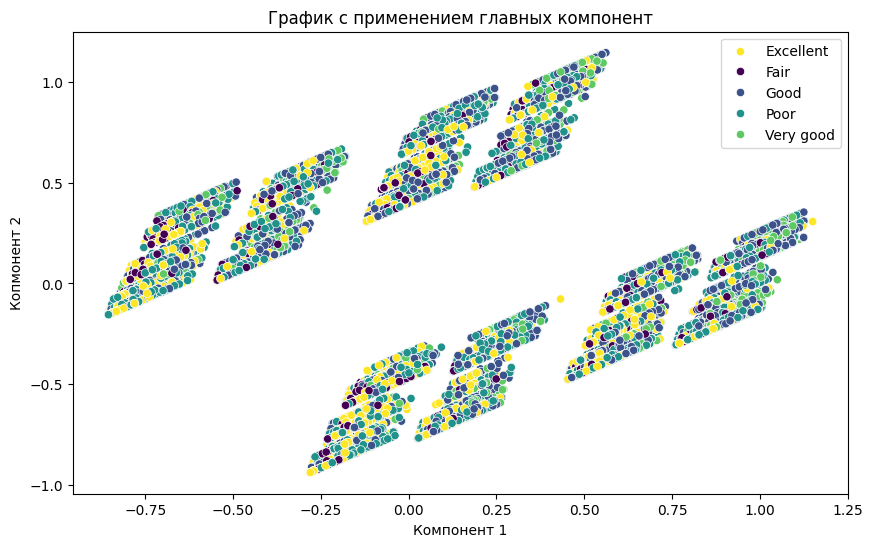

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=Y, palette='viridis')
plt.title('График с применением главных компонент')
plt.xlabel('Компонент 1')
plt.ylabel('Копмонент 2')
plt.legend(["Excellent", "Fair", "Good", "Poor", "Very good"])
plt.show()

### Метод К-средних

In [7]:
best_silhouette_score = float('-inf')
best_max_iter = -1

for max_iter in [100, 200, 300]:
    kmeans = KMeans(n_init='auto', random_state=42, n_clusters=5, max_iter=max_iter)
    kmeans.fit(X_pca)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, labels)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_max_iter = max_iter
        best_model = kmeans

print("Лучший средний коэффициент силуэта:", best_silhouette_score)
print("Лучшие параметры:", best_max_iter)
k_means_model = best_model

Лучший средний коэффициент силуэта: 0.6424141730352828
Лучшие параметры: 100


### График для метода к средних

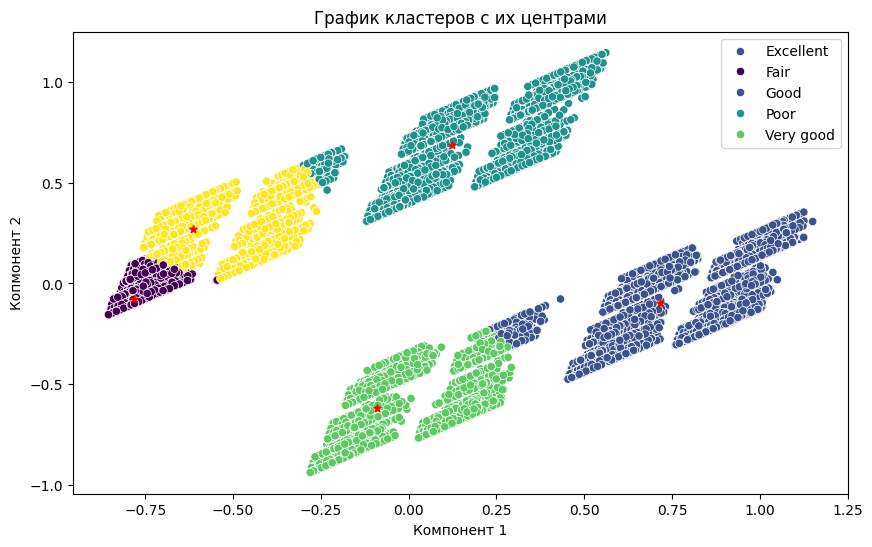

In [8]:
сentroids = k_means_model.cluster_centers_
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=k_means_model.labels_, palette='viridis')
plt.scatter(сentroids[:, 0], сentroids[:, 1], c='red', marker='*', s=30, label='Центр кластера')
plt.title('График кластеров с их центрами')
plt.xlabel('Компонент 1')
plt.ylabel('Копмонент 2')
plt.legend(["Excellent", "Fair", "Good", "Poor", "Very good"])
plt.show()

### Метод DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**eps** - Максимальное расстояние между двумя выборками, чтобы одна из них считалась расположенной по соседству с другой. Это не максимальное ограничение расстояний между точками внутри кластера. 

**min_samples** - количество выборок (или общий вес) в окрестности точки, которая будет рассматриваться как основная точка. Сюда входит сама точка. Если для параметра min_samples установлено более высокое значение, DBSCAN найдет плотные кластеры, тогда как если для него установлено более низкое значение, найденные кластеры будут более разреженными.

In [9]:
best_silhouette_score = float('-inf')
best_params = None
for min_samples in [5, 10, 15]:
    for eps in [0.5, 1.0]:
        print(min_samples, eps)
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        dbscan.fit(X)
        labels = dbscan.labels_
        if len(np.unique(labels)) > 1:
            silhouette_avg = silhouette_score(X, labels)
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_model = dbscan
                best_params = (min_samples, eps)

print("Лучший средний коэффициент силуэта:", best_silhouette_score)
print(f"Параметры: {best_params}")
dbscan_model = best_model

5 0.5
5 1.0
10 0.5
10 1.0
15 0.5
15 1.0
Лучший средний коэффициент силуэта: 0.31789878673484845
Параметры: (15, 0.5)


### График для метода DBSCAN

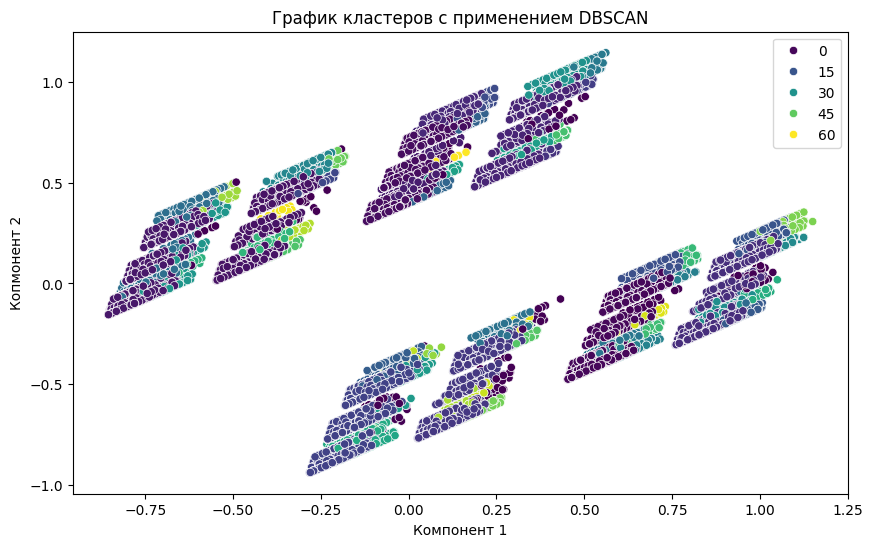

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_model.labels_, palette='viridis')
plt.title('График кластеров с применением DBSCAN')
plt.xlabel('Компонент 1')
plt.ylabel('Копмонент 2')
plt.legend()
plt.show()

### Подготовка данных для агломеративной кластеризации

In [11]:
df_subset = scaled_df.sample(frac=0.15)
Y_subset = (df_subset["GeneralHealth"] * 4).astype(int)
X_subset = df_subset.drop("GeneralHealth", axis=1)
X_subset_pca = PCA(n_components=2).fit_transform(X_subset)

### Метод иерархической кластеризации

**Linkage**. Какой критерий связи использовать. Критерий связи определяет, какое расстояние использовать между наборами наблюдений. Алгоритм объединит пары кластеров, которые минимизируют этот критерий.

"ward" минимизирует дисперсию объединяемых кластеров.

"average" использует среднее значение расстояний каждого наблюдения двух наборов.

"complete" связь использует максимальные расстояния между всеми наблюдениями двух наборов.

"single" использует минимальное из расстояний между всеми наблюдениями двух наборов.

**compute_full_tree** - досрочно останавливает построение дерева на n_clusters. Это полезно для уменьшения времени вычислений, если количество кластеров невелико по сравнению с количеством выборок. Эта опция полезна только при указании матрицы связности.

In [16]:
best_silhouette_score = float('-inf')
best_params = None

for compute_full_tree in [True, False]:
    for linkage in ['average', 'ward', 'complete', 'single']:
        print(compute_full_tree, linkage)
        agg_cluster = AgglomerativeClustering(n_clusters=5,
                                              compute_full_tree=compute_full_tree,
                                              linkage=linkage)
        agg_cluster.fit(X_subset_pca)
        labels = agg_cluster.labels_
        if len(np.unique(labels)) > 1:
            silhouette_avg = silhouette_score(X_subset_pca, labels)
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_model = agg_cluster
                best_params = (compute_full_tree, linkage)

print("Лучший средний Silhouette:", best_silhouette_score)
print(f"Параметры: {best_params}")
agg_model_pca = best_model

True average
True ward
True complete
True single
False average
False ward
False complete
False single
Лучший средний Silhouette: 0.6340127666155274
Параметры: (True, 'average')


### График для иерархической кластеризации

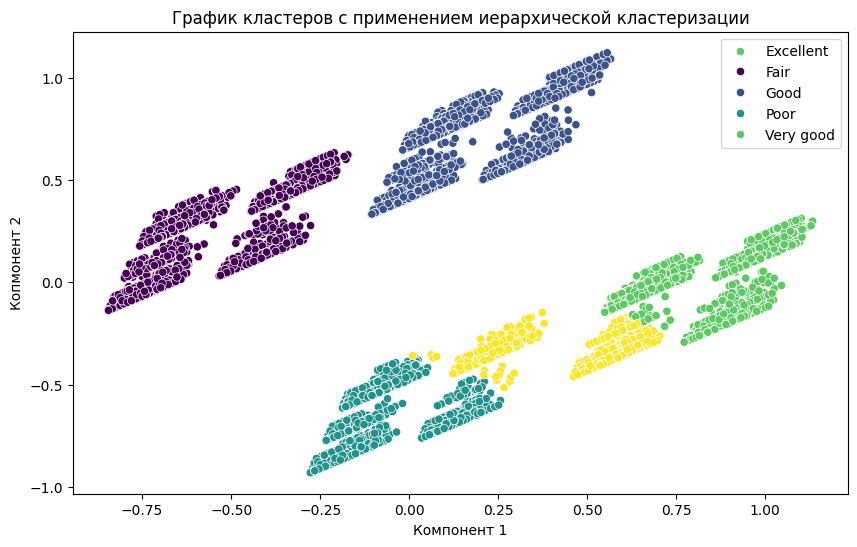

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_subset_pca[:, 0], y=X_subset_pca[:, 1], hue=agg_model_pca.labels_, palette='viridis')
plt.title('График кластеров с применением иерархической кластеризации')
plt.xlabel('Компонент 1')
plt.ylabel('Копмонент 2')
plt.legend(["Excellent", "Fair", "Good", "Poor", "Very good"])
plt.show()

## Экспертная оценка

In [14]:
from sklearn.metrics import (davies_bouldin_score, 
                             calinski_harabasz_score, 
                             adjusted_rand_score, 
                             homogeneity_completeness_v_measure,
                             confusion_matrix,
                             fowlkes_mallows_score)

## Внутренние метрики
### Коэффициент силуэта
Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера (a) и среднего расстояния до ближайшего кластера (b) для каждой выборки. Коэффициент силуэта для выборки равен (b - a) / max(a, b). Чтобы пояснить, b - это расстояние между выборкой и ближайшим кластером, частью которого выборка не является.

Наилучшее значение равно 1, а наихудшее -1. Значения, близкие к 0, указывают на перекрывающиеся кластеры.

### Критерий коэффициента дисперсии (оценка Калински и Харабаса)
Измеряет компактность и разделение кластеров (0 - лучше)

### Критерий Дэвиса-Боулдина
Определяется как средняя мера сходства каждого кластера с его наиболее похожим кластером, где сходство - это отношение расстояний внутри кластера к расстояниям между кластерами. Таким образом, кластеры, расположенные дальше друг от друга и менее рассредоточенные, приведут к лучшему результату.

Минимальный балл равен нулю, при этом более низкие значения указывают на лучшую кластеризацию.
## Внешние метрики

### Rand-индекс с поправкой на случайность
Измеряет сходство между истинными метками и предсказанными метками после кластеризации

### Вычисление однородности, полноты, и V-measure
Предоставляют информацию о точности кластеризации с использованием информации о классах

### FMI
Измеряет точность и полноту кластеризации, используя информацию о классах

## Confusion matrix
Определяет точность классификации


KMeans(max_iter=100, n_clusters=5, n_init='auto', random_state=42)
246022
Критерий Дэвиса-Боулдина: 0.45470762378950413
Критерий коэффициента дисперсии: 619705.5342179134
Rand-индекс с поправкой на случайность: 0.00739992752061421
Однородность: 0.015602245990100305
Полнота: 0.014299321655303312
V-measure: 0.014922397153441892
FMI: 0.25016448883028086


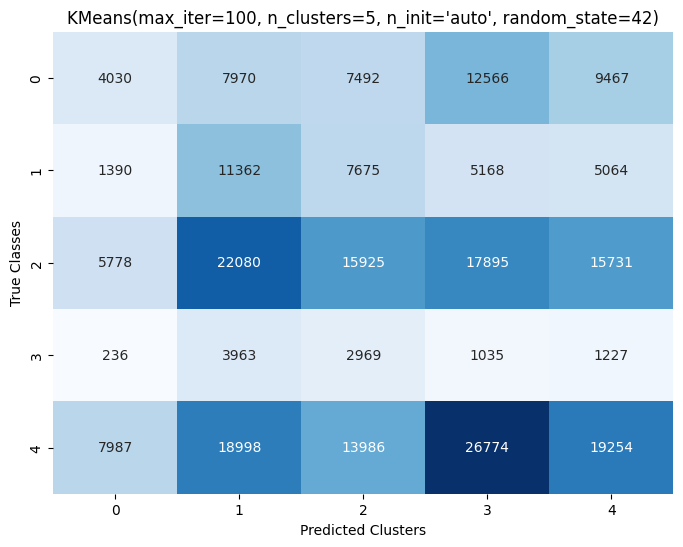

----------------------------
DBSCAN(min_samples=15, n_jobs=-1)
246022
Критерий Дэвиса-Боулдина: 2.131880396776308
Критерий коэффициента дисперсии: 68403.3273487071
Rand-индекс с поправкой на случайность: 0.028180980634325094
Однородность: 0.05233588626284399
Полнота: 0.031934814027448445
V-measure: 0.03966590497072554
FMI: 0.22187796789116032


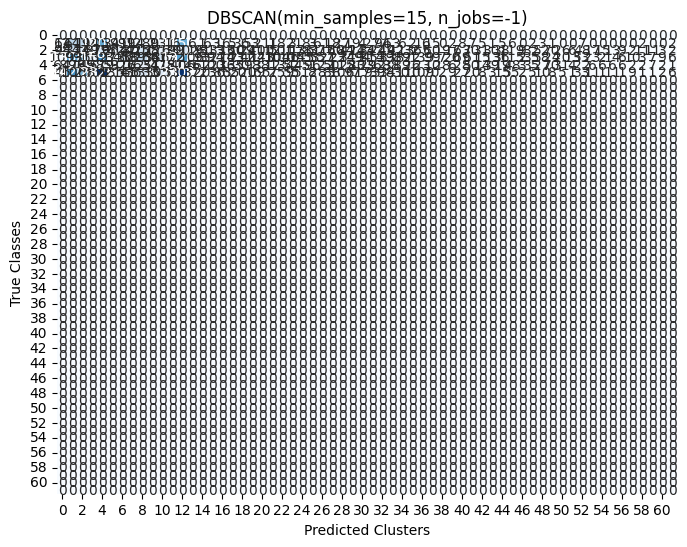

----------------------------
AgglomerativeClustering(compute_full_tree=True, linkage='average', n_clusters=5)
36903
Критерий Дэвиса-Боулдина: 0.5503133757442009
Критерий коэффициента дисперсии: 103815.08006345661
Rand-индекс с поправкой на случайность: 0.013295003163548928
Однородность: 0.017549036299612367
Полнота: 0.016099052348019314
V-measure: 0.01679280252755968
FMI: 0.2554609010459185


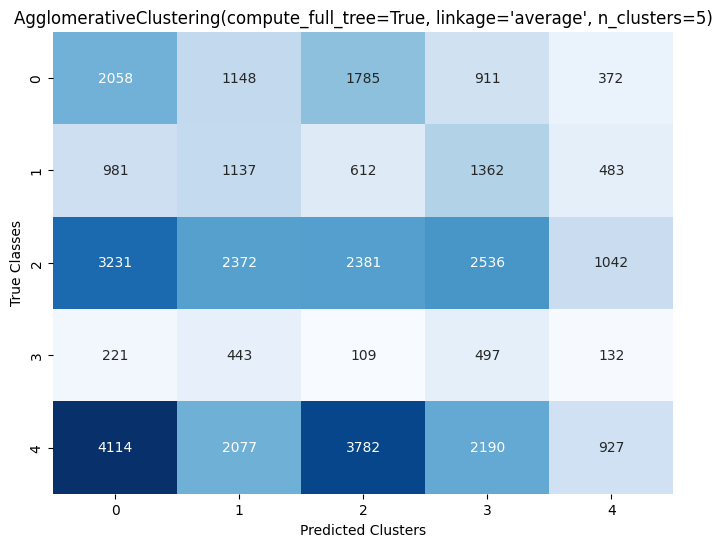

----------------------------


In [18]:
def print_inner_model_metrics(data, model_labels):
    ch_index = calinski_harabasz_score(data, model_labels)
    db_index = davies_bouldin_score(data, model_labels)
    print(f"Критерий Дэвиса-Боулдина: {db_index}")
    print(f"Критерий коэффициента дисперсии: {ch_index}")

def print_outer_model_metrics(true_labels, predicted_labels):
    ari_score = adjusted_rand_score(true_labels, predicted_labels)
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_labels, predicted_labels)
    fm_index = fowlkes_mallows_score(true_labels, predicted_labels)
    print(f"Rand-индекс с поправкой на случайность: {ari_score}")
    print(f"Однородность: {homogeneity}\nПолнота: {completeness}\nV-measure: {v_measure}")
    print(f"FMI: {fm_index}")

def show_confusion_matrix(y_set, model):
    conf_matrix = confusion_matrix(y_set, model.labels_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(str(model))
    plt.xlabel('Predicted Clusters')
    plt.ylabel('True Classes')
    plt.show()

for model in [k_means_model, dbscan_model, agg_model_pca]:
    print(model)
    if model == agg_model_pca:
        x = X_subset_pca
        y = Y_subset
    else:
        x = X_pca
        y = Y
    print(len(y))
    print_inner_model_metrics(x, model.labels_)
    print_outer_model_metrics(y, model.labels_)
    show_confusion_matrix(y, model)
    print('----------------------------')
